# Using Embedding to study the semantic of scales - Perform Analysis

## 2D Visualization of Scales by Domain

In [1]:
import pandas as pd
import numpy as np

# load scale_embedding.csv
df = pd.read_csv('scale_embedding.csv')

# display the first 5 rows
df.head()

,Label,Domain,Item,embedding
0,BFAS,A,Feel others' emotions. Inquire about others' w...,"[-0.03878074139356613, -0.03584016114473343, -..."
1,BFAS,C,Carry out my plans. Finish what I start. Get t...,"[-0.02413344755768776, -0.032024409621953964, ..."
2,BFAS,E,Make friends easily. Warm up quickly to others...,"[-0.014023968949913979, -0.012293558567762375,..."
3,BFAS,N,Get angry easily. Get upset easily. Change my ...,"[-0.02684589847922325, -0.020284811034798622, ..."
4,BFAS,O,Am quick to understand things. Can handle a lo...,"[-0.0016384224873036146, 0.009490537457168102,..."


In [2]:
matrix = df.embedding.apply(eval).to_list()

matrix_np = np.array(matrix)

In [3]:
from sklearn.manifold import TSNE

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix_np)

In [4]:
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

In [5]:
df['tsne_x'] = x
df['tsne_y'] = y

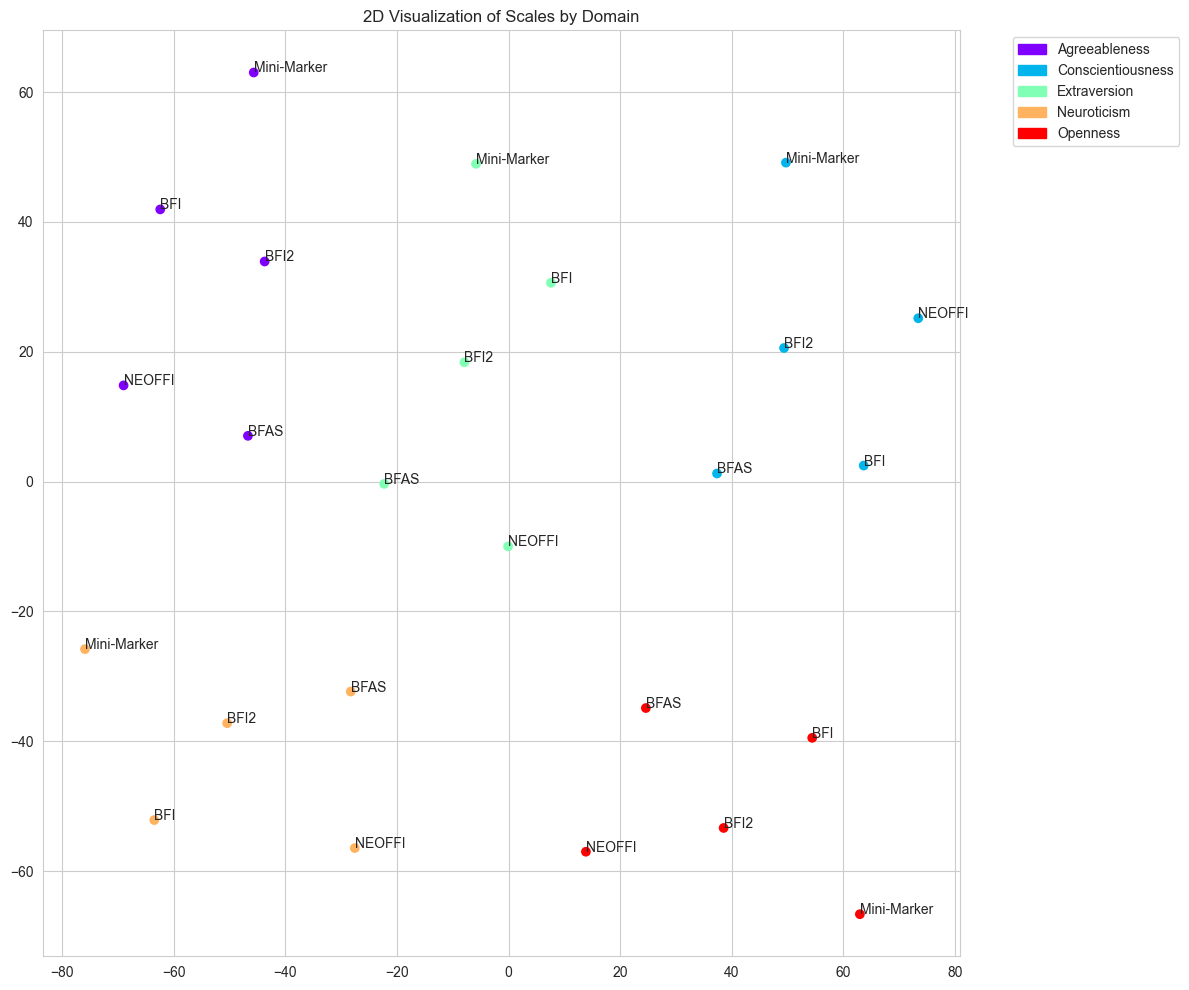

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Assuming df and other necessary imports are already in place

# Create a colormap for the unique values in 'Domain'
unique_domains = df['Domain'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_domains)))
colormap = dict(zip(unique_domains, colors))

# Create a new column 'color' in the DataFrame based on 'Domain'
df['color'] = df['Domain'].map(colormap)

plt.figure(figsize=(12, 10))  # Increased figure size to accommodate legend
plt.scatter(df.tsne_x, df.tsne_y, c=df['color'])

for i, txt in enumerate(df.Label):
    plt.annotate(txt, (df.tsne_x[i], df.tsne_y[i]))
    
# create a map for domain to full name: A to Agreeableness, E to Extraversion, C to Conscientiousness, N to Neuroticism, O to Openness
domain_full_name = {'A': 'Agreeableness', 'E': 'Extraversion', 'C': 'Conscientiousness', 'N': 'Neuroticism', 'O': 'Openness'}

# Create a custom legend
patches = [mpatches.Patch(color=colormap[domain], label=domain_full_name[domain]) for domain in unique_domains]

# Move the legend outside the plot
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('2D Visualization of Scales by Domain')

# Adjust the layout to prevent cutting off the legend
plt.tight_layout()

plt.savefig('2d_visualization_of_scales_by_domain.png', bbox_inches='tight')

plt.show()

## 3D Visualization of Scales by Domain

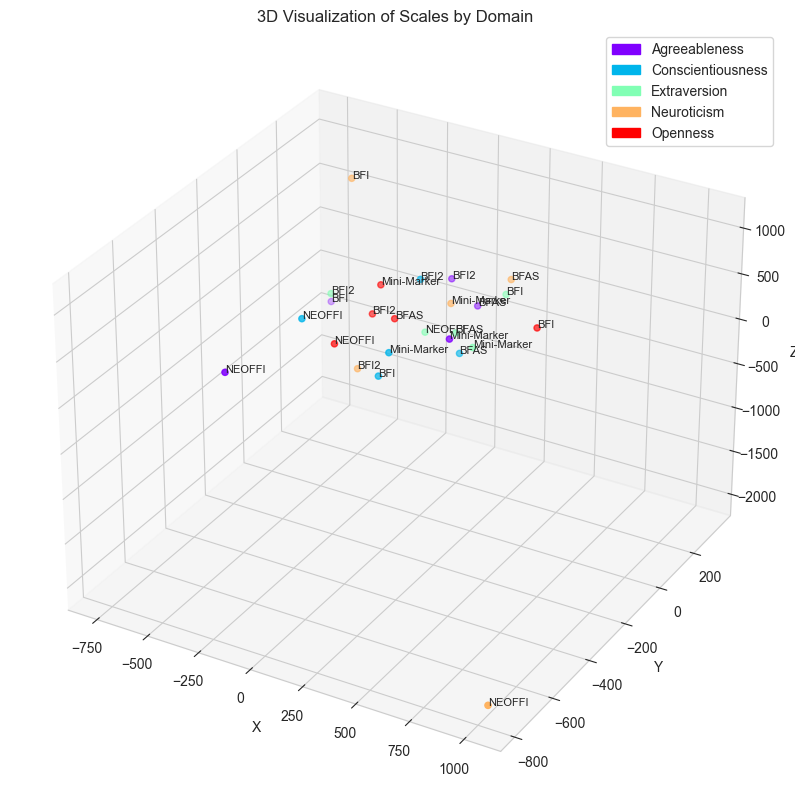

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE

# Load scale_embedding.csv
df = pd.read_csv('scale_embedding.csv')

# Convert embeddings to numpy array
matrix = df.embedding.apply(eval).to_list()
matrix_np = np.array(matrix)

# Create a t-SNE model and transform the data to 3D
tsne = TSNE(n_components=3, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix_np)

# Extract x, y, and z coordinates
x = [coord[0] for coord in vis_dims]
y = [coord[1] for coord in vis_dims]
z = [coord[2] for coord in vis_dims]

# Add new columns to the dataframe
df['tsne_x'] = x
df['tsne_y'] = y
df['tsne_z'] = z

# Create a colormap for the unique values in 'Domain'
unique_domains = df['Domain'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_domains)))
colormap = dict(zip(unique_domains, colors))

# Create a new column 'color' in the DataFrame based on 'Domain'
df['color'] = df['Domain'].map(colormap)

# Create a map for domain to full name
domain_full_name = {'A': 'Agreeableness', 'E': 'Extraversion', 'C': 'Conscientiousness', 'N': 'Neuroticism', 'O': 'Openness'}

# Create the 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(df.tsne_x, df.tsne_y, df.tsne_z, c=df['color'])

# Add labels
for i, txt in enumerate(df.Label):
    ax.text(df.tsne_x[i], df.tsne_y[i], df.tsne_z[i], txt, size=8)

# Create a custom legend
patches = [mpatches.Patch(color=colormap[domain], label=domain_full_name[domain]) for domain in unique_domains]
plt.legend(handles=patches)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Visualization of Scales by Domain')

plt.savefig('3d_visualization_of_scales_by_domain.png')
plt.show()

# Compare cosince similarity between scales

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

agreeableness = df[df['Domain'] == 'A']

agreeableness_similarity = cosine_similarity(agreeableness.embedding.apply(eval).to_list(), agreeableness.embedding.apply(eval).to_list())

In [9]:
extraversion = df[df['Domain'] == 'E']

extraversion_similarity = cosine_similarity(extraversion.embedding.apply(eval).to_list(), extraversion.embedding.apply(eval).to_list())

In [10]:
conscientiousness = df[df['Domain'] == 'C']

conscientiousness_similarity = cosine_similarity(conscientiousness.embedding.apply(eval).to_list(), conscientiousness.embedding.apply(eval).to_list())

In [11]:
neuroticism = df[df['Domain'] == 'N']

neuroticism_similarity = cosine_similarity(neuroticism.embedding.apply(eval).to_list(), neuroticism.embedding.apply(eval).to_list())

In [12]:
openness = df[df['Domain'] == 'O']

openness_similarity = cosine_similarity(openness.embedding.apply(eval).to_list(), openness.embedding.apply(eval).to_list())

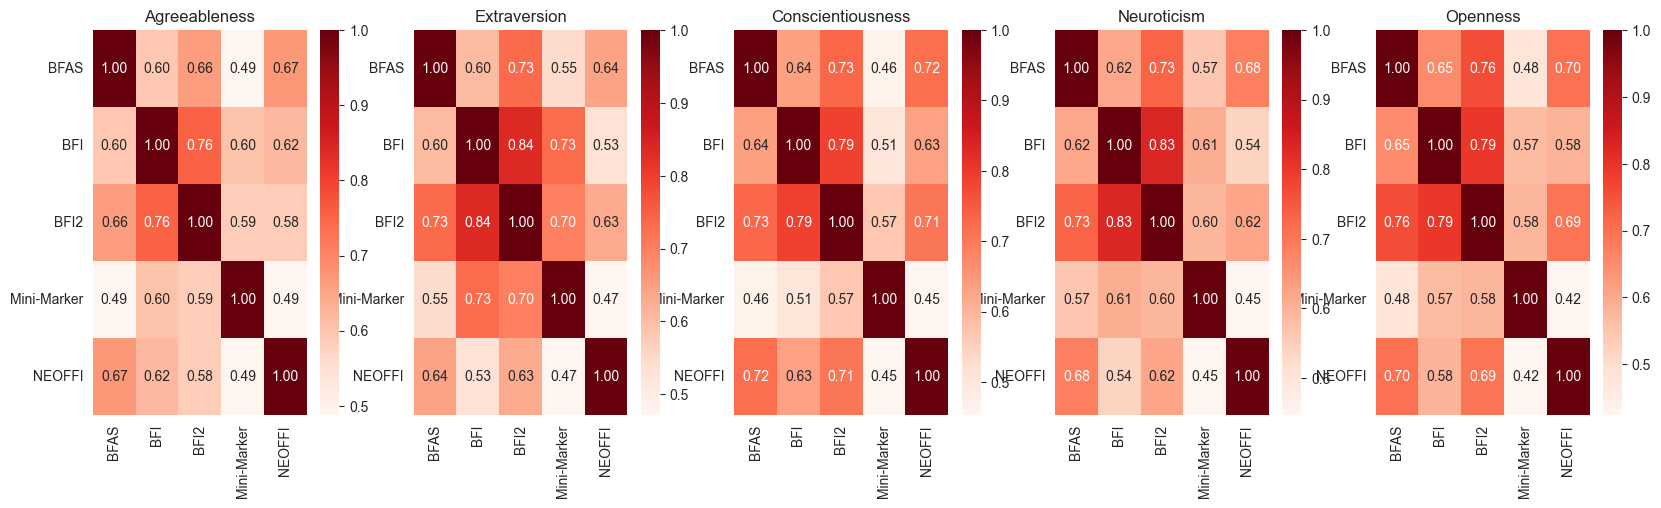

In [13]:
# create a heatmap for each domain
import seaborn as sns

labels = agreeableness.Label # can be any domain

fig, ax = plt.subplots(1, 5, figsize=(20, 5))

sns.heatmap(agreeableness_similarity, cmap='Reds', annot=True, fmt=".2f", ax=ax[0])
ax[0].set_title('Agreeableness')


sns.heatmap(extraversion_similarity, cmap='Reds', annot=True, fmt=".2f", ax=ax[1])
ax[1].set_title('Extraversion')


sns.heatmap(conscientiousness_similarity, cmap='Reds', annot=True, fmt=".2f", ax=ax[2])
ax[2].set_title('Conscientiousness')


sns.heatmap(neuroticism_similarity, cmap='Reds', annot=True, fmt=".2f",  ax=ax[3])
ax[3].set_title('Neuroticism')


sns.heatmap(openness_similarity, cmap='Reds', annot=True, fmt=".2f", ax=ax[4])
ax[4].set_title('Openness')

# Set the x and y labels of the heatmap
ax[0].set_xticklabels(labels, rotation=90)
ax[0].set_yticklabels(labels, rotation=0)
ax[1].set_xticklabels(labels, rotation=90)
ax[1].set_yticklabels(labels, rotation=0)
ax[2].set_xticklabels(labels, rotation=90)
ax[2].set_yticklabels(labels, rotation=0)
ax[3].set_xticklabels(labels, rotation=90)
ax[3].set_yticklabels(labels, rotation=0)
ax[4].set_xticklabels(labels, rotation=90)
ax[4].set_yticklabels(labels, rotation=0)

# save the heatmap
plt.savefig('heatmap.png')

plt.show()

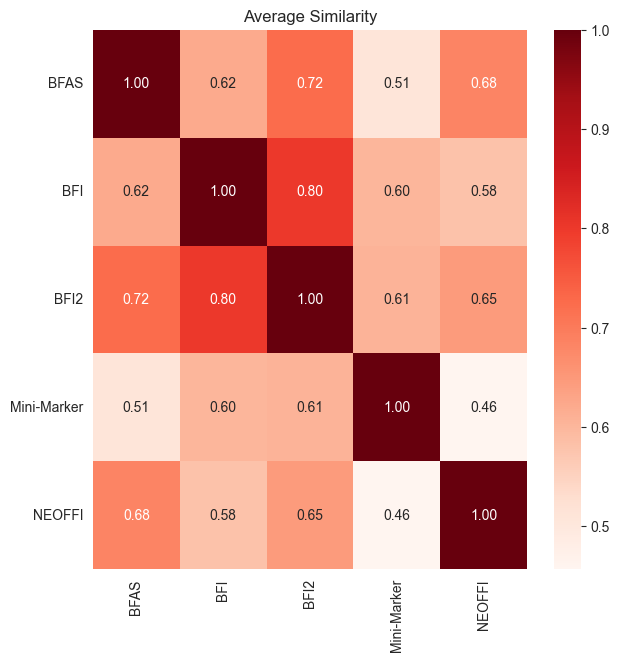

In [14]:
# compute the average similarity across all domains
average_similarity = (agreeableness_similarity + extraversion_similarity + conscientiousness_similarity + neuroticism_similarity + openness_similarity) / 5

# create a heatmap for the average similarity
plt.figure(figsize=(7, 7))
sns.heatmap(average_similarity, cmap='Reds', annot=True, fmt=".2f")
plt.title('Average Similarity')
plt.xticks(rotation=90)
plt.yticks(rotation=0)


# Set the x and y labels of the heatmap
plt.xticks(np.arange(len(labels))+0.5, labels)
plt.yticks(np.arange(len(labels))+0.5, labels)
    
# save the heatmap
plt.savefig('average_similarity_heatmap.png')

plt.show()

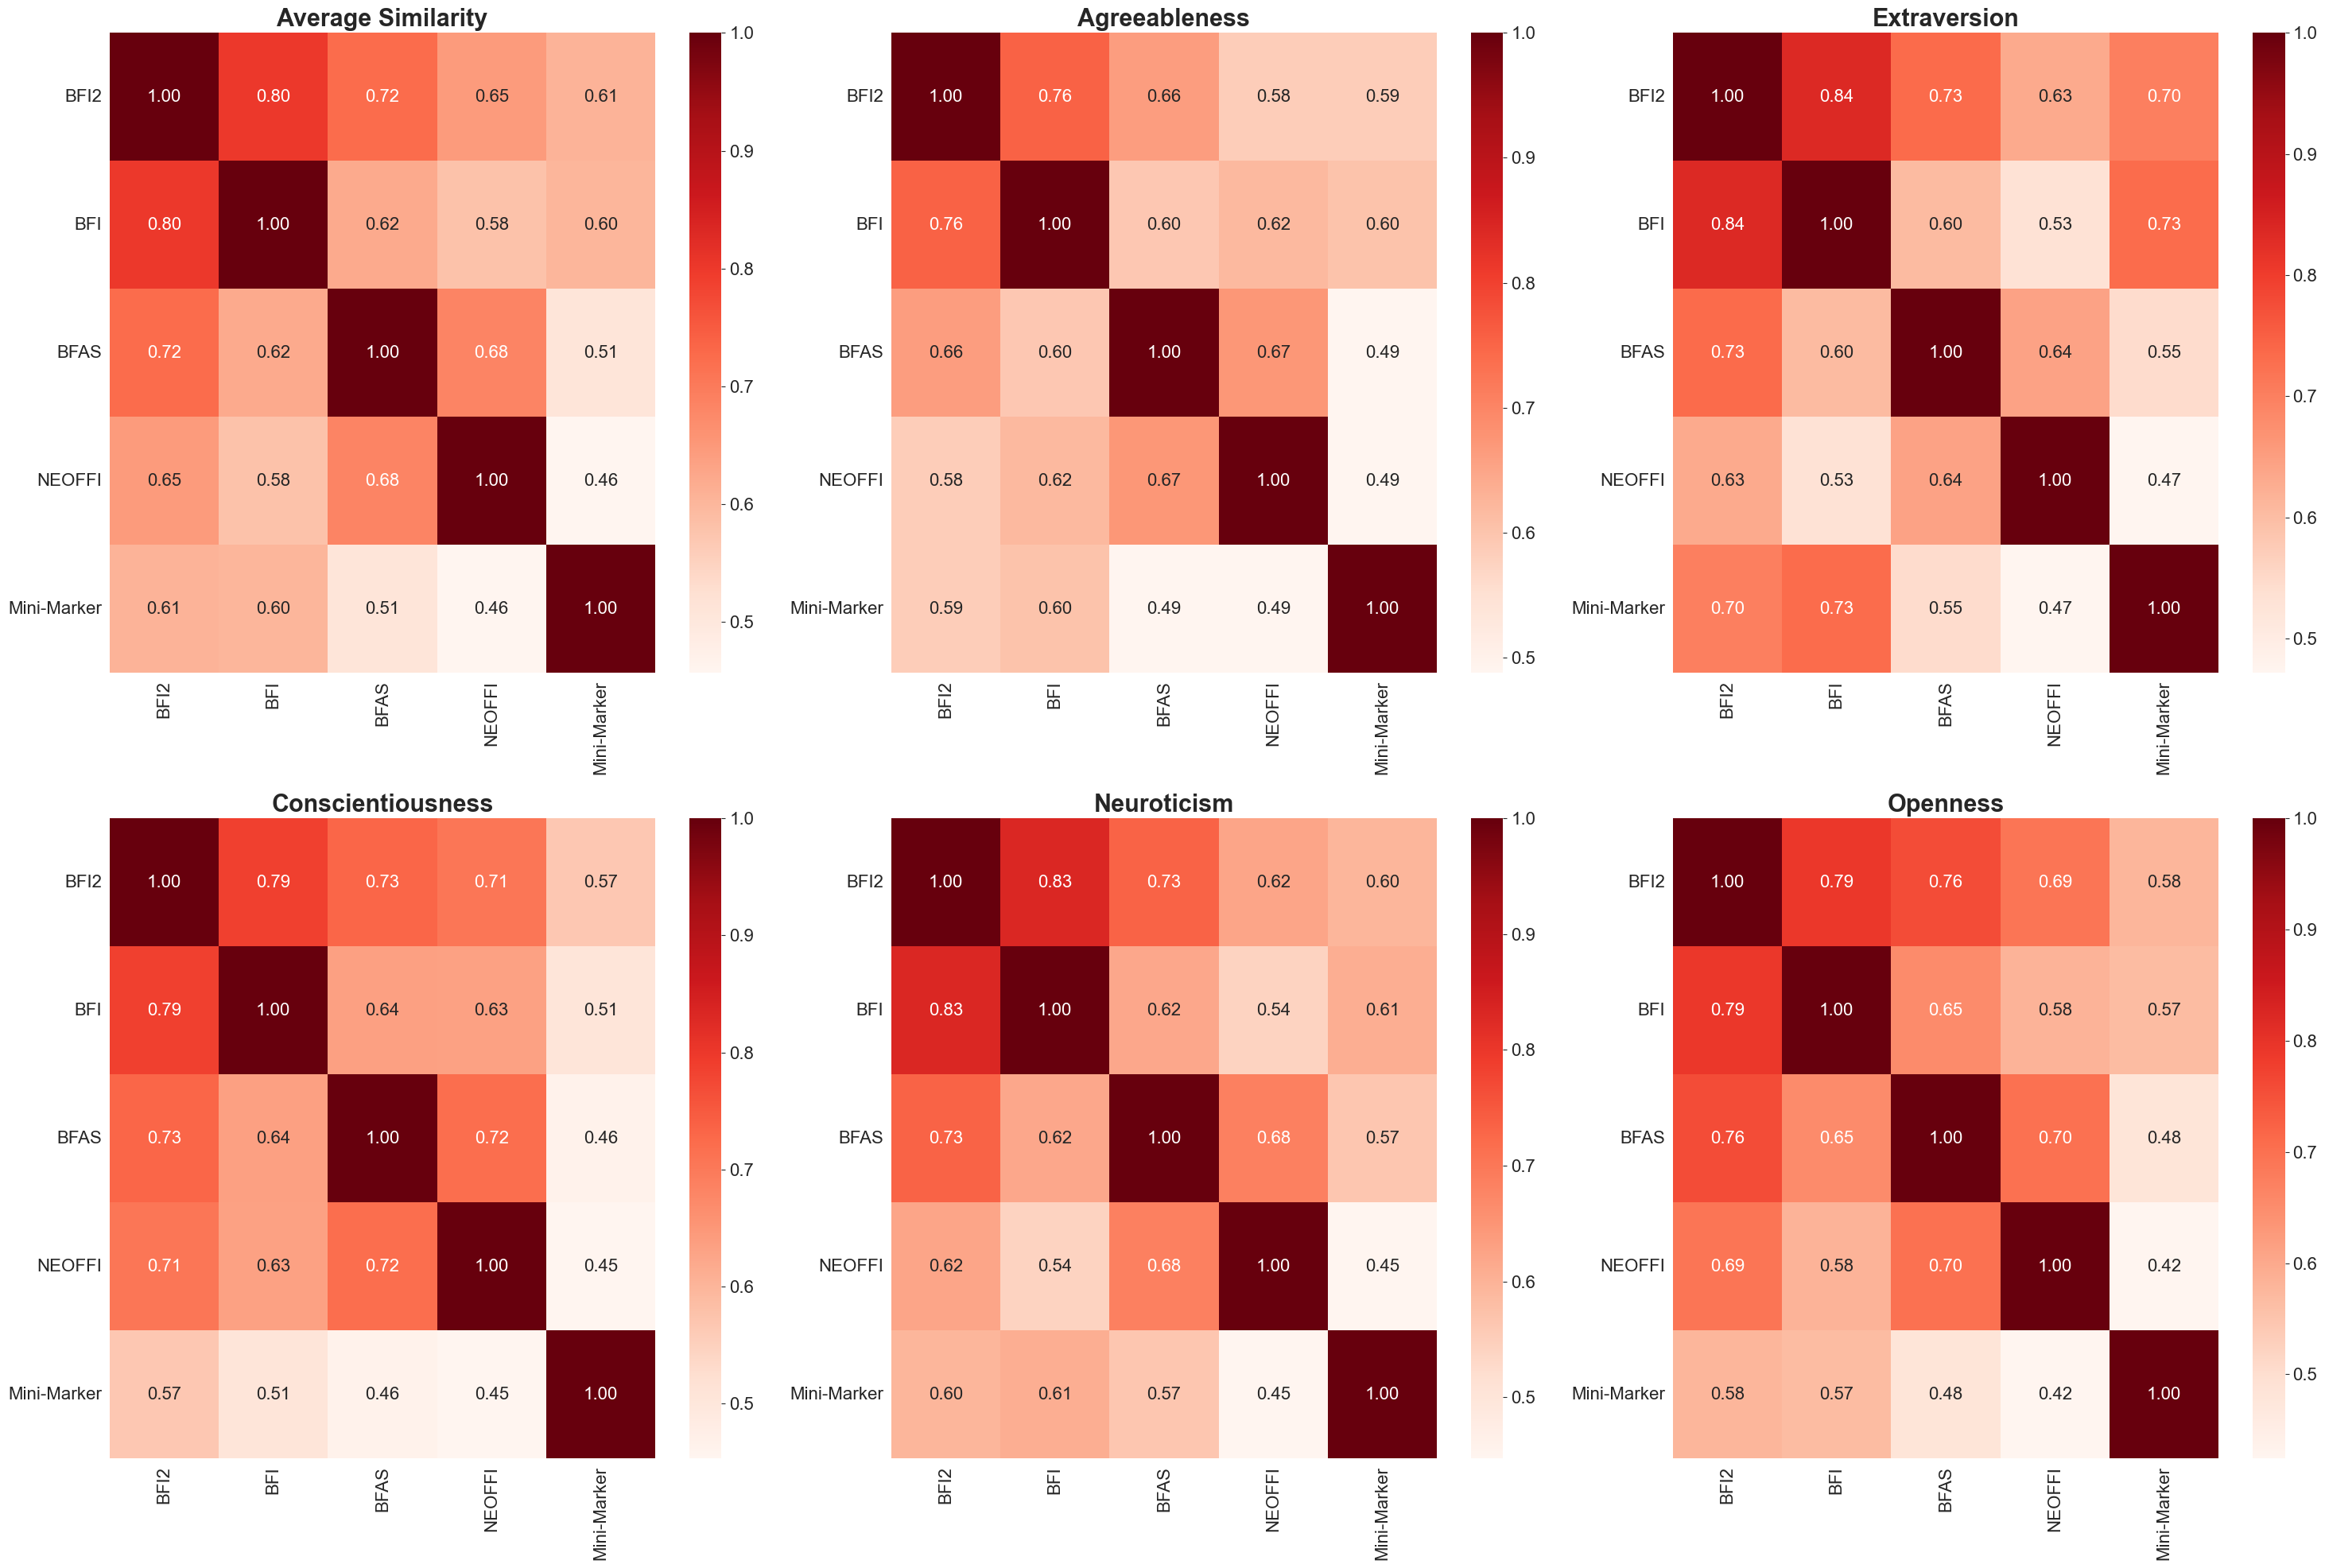

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Convert labels to a list if it's not already
labels = labels.tolist() if isinstance(labels, (pd.Series, pd.Index)) else list(labels)

# Sort the average similarity matrix
sorted_indices = np.argsort(average_similarity.sum(axis=1))[::-1]
sorted_labels = np.array(labels)[sorted_indices]

# Function to sort a matrix based on the sorted indices
def sort_matrix(matrix):
    return matrix[sorted_indices][:, sorted_indices]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(30, 20))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Define the domains and their corresponding similarity matrices
domains = [
    ('Average Similarity', sort_matrix(average_similarity)),
    ('Agreeableness', sort_matrix(agreeableness_similarity)),
    ('Extraversion', sort_matrix(extraversion_similarity)),
    ('Conscientiousness', sort_matrix(conscientiousness_similarity)),
    ('Neuroticism', sort_matrix(neuroticism_similarity)),
    ('Openness', sort_matrix(openness_similarity))
]

# Increase font size for all text elements
plt.rcParams.update({'font.size': 16})

# Plot each heatmap
for i, (title, similarity_matrix) in enumerate(domains):
    sns.heatmap(similarity_matrix, cmap='Reds', annot=True, fmt=".2f", ax=axs[i], annot_kws={'size': 16})
    axs[i].set_title(title, fontsize=22, fontweight='bold')
    axs[i].set_xticklabels(sorted_labels, rotation=90, fontsize=16)
    axs[i].set_yticklabels(sorted_labels, rotation=0, fontsize=16)
    
    # Remove y-axis label for all subplots
    axs[i].set_ylabel('')
    
    # Remove x-axis label for all subplots
    axs[i].set_xlabel('')

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('combined_sorted_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()